<목차>
- FAISS란
- How Faiss works
- 설치

### FAISS란
- FAISS란 유사성 검색을 위한 방법을 포함하며
- (유사성 검색을 위한) 인스턴스는 정수를 원소로하는 벡터로 표현되어 있고,  벡터 끼리는 L2(유클리드) 거리 또는 내적과 비교할 수 있다고 가정한다.
- 쿼리 벡터와 유사한 벡터는 L2 거리가 가장 낮거나, 내적이 가장 높은 벡터이다. 또한, 정규화된 벡터의 내적이므로 코사인 유사성을 지원한다.

- `이진 벡터` 및 `컴팩트 양자화 코드`를 기반으로 하는 방법은 `벡터의 압축된 표현만을 사용하며` 원본 벡터를 유지할 필요가 없다.
- 이는 일반적으로 검색 정확도가 떨어지지만 이러한 방법은 단일 서버의 메인 메모리에서 수십억 개의 벡터로 확장될 수 있습니다.
- `HNSW 및 NSG와 같은 다른 방법은 원시 벡터 위에 인덱싱 구조를 추가`하여 검색을 보다 효율적으로 만든다.

- GPU 구현은 CPU 또는 GPU 메모리의 입력을 받아들일 수 있다.
- GPU가 있는 서버에서 `GPU 인덱스는 CPU 인덱스를 즉시 대체`하여 사용할 수 있으며(예: IndexFlatL2를 GpuIndexFlatL2로 교체) 
- GPU 메모리와의 복사본이 자동으로 처리된다.
- 그러나 입력과 출력이 모두 GPU에 남아 있으면 결과가 더 빨라진다. 단일 및 다중 GPU 사용이 모두 지원된다.

#### How Faiss works
- Faiss는 `벡터 세트를 저장하는 인덱스 타입`을 중심으로 구축되었으며 L2 및는 내적 벡터 비교를 통해 검색하는 기능을 제공한다.
- 인덱스 타입은 정확한 검색과 같은 기본적인 베이스라인이다.
- 사용 가능한 대부분의 인덱스 구조는 다음과 관련하여 다양한 균형을 이루고 있다.
  - 검색 시간
  - 검색 품질
  - 인덱스 벡터당 사용되는 메모리
  - 훈련 시간
  - 추가 시간
  - 비지도 훈련을 위한 외부 데이터가 필요
- (추가 설명)
  - 인덱스는 벡터 데이터 구조를 나타내는 메타데이터. FAISS는 데이터를 양자화 하여 인덱스를 생성하고, 이후 인덱스를 사용하여 유사성 검색을 수행한다.

참고 사이트
- https://github.com/facebookresearch/faiss/wiki
- https://github.com/facebookresearch/faiss/tree/main/tutorial/python
- https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/

#### 설치
$ pip install faiss-gpu=1.6.3

---- 

#### 코드 실습
- https://velog.io/@kh7ae/Faiss%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B3%A0%EC%B0%A8%EC%9B%90-%EB%B2%A1%ED%84%B0-%EC%9C%A0%EC%82%AC%EB%8F%84-%EA%B5%AC%ED%95%98%EA%B8%B0

In [ ]:
# IndexFlatL2는 가장 기초적인 brute-force algorithm이며, Euclidean Distance에 근거
import faiss

index = faiss.IndexFlatL2(dimention) # 인덱스를 빌드
index.add(vector) # 벡터를 인덱스에 추가

k = 4  # 4개의 가장 가까운 이웃을 검사
distances, indices = index.search(query vector, k) # 벡터 목록에서 K개 이웃 검색
print(indices[:5])   # neighbors of the 5 first queries
print(indices[-5:])  # neighbors of the 5 last queries

In [ ]:
import faiss

index = faiss.IndexFlatIP(dimension) # IndexFlatL2 대신에 IndexFlatIP
faiss.normalize_L2(vector) # vector를 add하기 전에 normalize_L2 정규화 진행???
index.add(vector) # 정규화를 마친 후에 add

k = 4  
distances, indices = index.search(query vecotr, k) # 이후 search는 똑같다.

-----

※ 코사인 유사도
- 벡터의 각도가 작아지면 유사하다고 판단, 멀어지면 유사하지 않다고 판단한다.
$$
similarity=cos(Θ)=\frac{A⋅B}{||A||\ ||B||}=\frac{\sum_{i=1}^{n}{A_{i}×B_{i}}}{\sqrt{\sum_{i=1}^{n}(A_{i})^2}×\sqrt{\sum_{i=1}^{n}(B_{i})^2}}
$$

In [ ]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

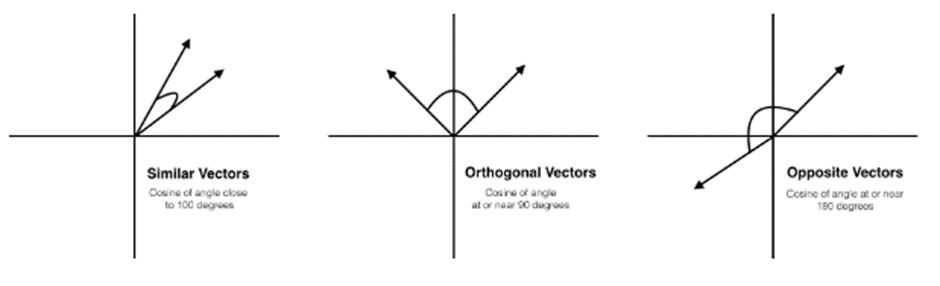